In [409]:
import json
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize

In [125]:
with open('worldcup.teams.json') as f:
    d = json.load(f)
    
teams_df = json_normalize(d['teams'])
teams_df = teams_df[['code','continent','name']]
teams_df.columns = ['code','continent','scorer_team']
teams_df.head()

,code,continent,scorer_team
0,EGY,Africa,Egypt
1,MAR,Africa,Morocco
2,TUN,Africa,Tunisia
3,SEN,Africa,Senegal
4,NGA,Africa,Nigeria


In [126]:
teams = teams_df['scorer_team'].unique()
teams

array(['Egypt', 'Morocco', 'Tunisia', 'Senegal', 'Nigeria', 'Japan',
       'South Korea', 'Costa Rica', 'Panama', 'Belgium', 'Germany',
       'Spain', 'France', 'Portugal', 'Denmark', 'Poland', 'Sweden',
       'Switzerland', 'Croatia', 'Serbia', 'Russia', 'Iceland', 'England',
       'Iran', 'Saudi Arabia', 'Mexico', 'Australia', 'Argentina',
       'Brazil', 'Uruguay', 'Colombia', 'Peru'], dtype=object)

In [127]:
with open('worldcup.json') as f:
    d = json.load(f)
    
games_df = json_normalize(data = d['rounds'], record_path = 'matches')
games_df

,city,date,goals1,goals2,group,knockout,num,score1,score1et,score1i,score1p,score2,score2et,score2i,score2p,stadium,team1,team2,time,timezone
0,Moscow,2018-06-14,"[{'name': 'Gazinsky', 'minute': 12, 'score1': ...",[],Group A,NaN,1,5,NaN,2,NaN,0,NaN,0,NaN,"{'key': 'luzhniki', 'name': 'Luzhniki Stadium'}","{'name': 'Russia', 'code': 'RUS'}","{'name': 'Saudi Arabia', 'code': 'KSA'}",18:00,UTC+3
1,Ekaterinburg,2018-06-15,[],"[{'name': 'Giménez', 'minute': 89, 'score1': 0...",Group A,NaN,2,0,NaN,0,NaN,1,NaN,0,NaN,"{'key': 'ekaterinburg', 'name': 'Ekaterinburg ...","{'name': 'Egypt', 'code': 'EGY'}","{'name': 'Uruguay', 'code': 'URU'}",17:00,UTC+5
2,Sochi,2018-06-15,"[{'name': 'Ronaldo', 'minute': 4, 'score1': 1,...","[{'name': 'Costa', 'minute': 24, 'score1': 1, ...",Group B,NaN,3,3,NaN,2,NaN,3,NaN,1,NaN,"{'key': 'fisht', 'name': 'Fisht Stadium'}","{'name': 'Portugal', 'code': 'POR'}","{'name': 'Spain', 'code': 'ESP'}",21:00,UTC+3
3,Saint Petersburg,2018-06-15,[],"[{'name': 'Bouhaddouz', 'minute': 90, 'offset'...",Group B,NaN,4,0,NaN,0,NaN,1,NaN,0,NaN,"{'key': 'saintpetersburg', 'name': 'Saint Pete...","{'name': 'Morocco', 'code': 'MAR'}","{'name': 'Iran', 'code': 'IRN'}",18:00,UTC+3
4,Kazan,2018-06-16,"[{'name': 'Griezmann', 'minute': 58, 'score1':...","[{'name': 'Jedinak', 'minute': 62, 'score1': 1...",Group C,NaN,5,2,NaN,0,NaN,1,NaN,0,NaN,"{'key': 'kazan', 'name': 'Kazan Arena'}","{'name': 'France', 'code': 'FRA'}","{'name': 'Australia', 'code': 'AUS'}",13:00,UTC+3
5,Saransk,2018-06-16,[],"[{'name': 'Poulsen', 'minute': 59, 'score1': 0...",Group C,NaN,6,0,NaN,0,NaN,1,NaN,0,NaN,"{'key': 'mordovia', 'name': 'Mordovia Arena'}","{'name': 'Peru', 'code': 'PER'}","{'name': 'Denmark', 'code': 'DEN'}",19:00,UTC+3
6,Moscow,2018-06-16,"[{'name': 'Agüero', 'minute': 19, 'score1': 1,...","[{'name': 'Finnbogason', 'minute': 23, 'score1...",Group D,NaN,7,1,NaN,1,NaN,1,NaN,1,NaN,"{'key': 'spartak', 'name': 'Spartak Stadium'}","{'name': 'Argentina', 'code': 'ARG'}","{'name': 'Iceland', 'code': 'ISL'}",16:00,UTC+3
7,Kaliningrad,2018-06-16,"[{'name': 'Etebo', 'minute': 32, 'score1': 1, ...",[],Group D,NaN,8,2,NaN,1,NaN,0,NaN,0,NaN,"{'key': 'kaliningrad', 'name': 'Kaliningrad St...","{'name': 'Croatia', 'code': 'CRO'}","{'name': 'Nigeria', 'code': 'NGA'}",21:00,UTC+2
8,Rostov-on-Don,2018-06-17,"[{'name': 'Coutinho', 'minute': 20, 'score1': ...","[{'name': 'Zuber', 'minute': 50, 'score1': 1, ...",Group E,NaN,9,1,NaN,1,NaN,1,NaN,0,NaN,"{'key': 'rostov', 'name': 'Rostov Arena'}","{'name': 'Brazil', 'code': 'BRA'}","{'name': 'Switzerland', 'code': 'SUI'}",21:00,UTC+3
9,Samara,2018-06-17,[],"[{'name': 'Kolarov', 'minute': 56, 'score1': 0...",Group E,NaN,10,0,NaN,0,NaN,1,NaN,0,NaN,"{'key': 'samara', 'name': 'Samara Arena'}","{'name': 'Costa Rica', 'code': 'CRC'}","{'name': 'Serbia', 'code': 'SRB'}",16:00,UTC+4


In [128]:
games_df[games_df['goals1'].isnull() == True]

,city,date,goals1,goals2,group,knockout,num,score1,score1et,score1i,score1p,score2,score2et,score2i,score2p,stadium,team1,team2,time,timezone
24,Saint Petersburg,2018-06-22,NaN,NaN,Group E,NaN,25,2,NaN,0,NaN,0,NaN,0,NaN,"{'key': 'saintpetersburg', 'name': 'Saint Pete...","{'name': 'Brazil', 'code': 'BRA'}","{'name': 'Costa Rica', 'code': 'CRC'}",15:00,UTC+3
36,Moscow,2018-06-26,NaN,NaN,Group C,NaN,37,0,NaN,0,NaN,0,NaN,0,NaN,"{'key': 'luzhniki', 'name': 'Luzhniki Stadium'}","{'name': 'Denmark', 'code': 'DEN'}","{'name': 'France', 'code': 'FRA'}",17:00,UTC+3


In [129]:
games_df.at[24, 'goals1'] = [{'name': 'Coutinho', 'minute': 90, 'offset': 1, 'score1': 1, 'score2': 0}, 
                                                {'name': 'Neymar', 'minute': 90, 'offset': 7, 'score1': 2, 'score2': 0}]
games_df.at[24, 'goals2'] = []
games_df[games_df['num'] == 25]

,city,date,goals1,goals2,group,knockout,num,score1,score1et,score1i,score1p,score2,score2et,score2i,score2p,stadium,team1,team2,time,timezone
24,Saint Petersburg,2018-06-22,"[{'name': 'Coutinho', 'minute': 90, 'offset': ...",[],Group E,NaN,25,2,NaN,0,NaN,0,NaN,0,NaN,"{'key': 'saintpetersburg', 'name': 'Saint Pete...","{'name': 'Brazil', 'code': 'BRA'}","{'name': 'Costa Rica', 'code': 'CRC'}",15:00,UTC+3


In [130]:
games_df.at[36, 'goals1'] = []
games_df.at[36, 'goals2'] = []
games_df[games_df['num'] == 36]

,city,date,goals1,goals2,group,knockout,num,score1,score1et,score1i,score1p,score2,score2et,score2i,score2p,stadium,team1,team2,time,timezone
35,Kaliningrad,2018-06-25,"[{'name': 'Isco', 'minute': 19, 'score1': 1, '...","[{'name': 'Boutaib', 'minute': 14, 'score1': 0...",Group B,NaN,36,2,NaN,1,NaN,2,NaN,1,NaN,"{'key': 'kaliningrad', 'name': 'Kaliningrad St...","{'name': 'Spain', 'code': 'ESP'}","{'name': 'Morocco', 'code': 'MAR'}",20:00,UTC+2


In [131]:
print(games_df['goals1'][0])

## minute
print('minute:',games_df['goals1'][0][0]['minute'])

## goalscorer
print('scorer:',games_df['goals1'][0][0]['name'])

## 



[{'name': 'Gazinsky', 'minute': 12, 'score1': 1, 'score2': 0}, {'name': 'Cheryshev', 'minute': 43, 'score1': 2, 'score2': 0}, {'name': 'Dzyuba', 'minute': 71, 'score1': 3, 'score2': 0}, {'name': 'Cheryshev', 'minute': 90, 'offset': 1, 'score1': 4, 'score2': 0}, {'name': 'Golovin', 'minute': 90, 'offset': 4, 'score1': 5, 'score2': 0}]
minute: 12
scorer: Gazinsky


for each game:

In creating the data frame for goals, relevant features have to be identified:
- minute of game
- 1st half
- 2nd half
- et1
- et2
- goalscorer
- country
- opponent
- 1st half added time
- 2nd half added time
- one hot encoding for losing/drawing/winning position
- knockout game?
- date
- stadium
- penalty?

In [132]:
goal_features = ['minute','period_scored','scorer','scorer_team','opp_team','1H_added','2H_added','penalty',
           'game_status','knockout','date','stadium', 'owngoal']

In [448]:
def time_period(minute):
    if minute <= 45:
        return '1H'
    elif minute > 45 & minute <= 90:
        return '2H'
    elif minute > 90 & minute <= 105:
        return 'et1'
    else:
        return 'et2'

In [449]:
def key_check(key, obj):
    if key in obj.keys():
        return True
    else:
        return False

In [450]:
def match_status1(goal):
    if goal['score1'] - 1 < goal['score2']:
        return 'losing'
    elif goal['score1'] - 1 == goal['score2']:
        return 'drawing'
    elif goal['score1'] - 1 > goal['score2']:
        return 'winning'
    
def match_status2(goal):
    if goal['score2'] - 1 < goal['score1']:
        return 'losing'
    elif goal['score2'] - 1 == goal['score1']:
        return 'drawing'
    elif goal['score2'] - 1 > goal['score1']:
        return 'winning'

In [455]:
all_goals = []

for index, match in games_df.iterrows():
    for goal in match['goals1']:
        goal_obj = dict.fromkeys(goal_features)
        goal_obj['minute'] = goal['minute']
        goal_obj['period_scored'] = time_period(goal_obj['minute'])
        goal_obj['scorer'] = goal['name'].lower()
        goal_obj['scorer_team'] = match['team1']['name']
        goal_obj['opp_team'] = match['team2']['name']
        if key_check('offset', goal) & (goal_obj['period_scored'] == '1H'):
            goal_obj['1H_added'] = goal['offset']
            goal_obj['2H_added'] = 0
        elif key_check('offset', goal) & (goal_obj['period_scored'] == '2H'):
            goal_obj['1H_added'] = 0
            goal_obj['2H_added'] = goal['offset']
        else:
            goal_obj['1H_added'] = 0
            goal_obj['2H_added'] = 0
        if key_check('penalty',goal):
            goal_obj['penalty'] = 1
        else:
            goal_obj['penalty'] = 0
        goal_obj['game_status'] = match_status1(goal)
        if match['knockout'] == True:
            goal_obj['knockout'] = 1
        else:
            goal_obj['knockout'] = 0
        goal_obj['date'] = match['date']
        goal_obj['stadium'] = match['stadium']['name']
        if key_check('owngoal', goal):
            goal_obj['owngoal'] = 1
        else:
            goal_obj['owngoal'] = 0
        all_goals.append(goal_obj)
        
## for opposing team
    for goal in match['goals2']:
        goal_obj = dict.fromkeys(goal_features)
        goal_obj['minute'] = goal['minute']
        goal_obj['period_scored'] = time_period(goal_obj['minute'])
        goal_obj['scorer'] = goal['name'].lower()
        goal_obj['scorer_team'] = match['team2']['name']
        goal_obj['opp_team'] = match['team1']['name']
        if key_check('offset', goal) & (goal_obj['period_scored'] == '1H'):
            goal_obj['1H_added'] = goal['offset']
            goal_obj['2H_added'] = 0
        elif key_check('offset', goal) & (goal_obj['period_scored'] == '2H'):
            goal_obj['1H_added'] = 0
            goal_obj['2H_added'] = goal['offset']
        else:
            goal_obj['1H_added'] = 0
            goal_obj['2H_added'] = 0
        if key_check('penalty',goal):
            goal_obj['penalty'] = 1
        else:
            goal_obj['penalty'] = 0
        goal_obj['game_status'] = match_status2(goal)
        if match['knockout'] == True:
            goal_obj['knockout'] = 1
        else:
            goal_obj['knockout'] = 0
        goal_obj['date'] = match['date']
        goal_obj['stadium'] = match['stadium']['name']
        if key_check('owngoal', goal):
            goal_obj['owngoal'] = 1
        else:
            goal_obj['owngoal'] = 0
        all_goals.append(goal_obj)  

all_goals

[{'1H_added': 0,
  '2H_added': 0,
  'date': '2018-06-14',
  'game_status': 'drawing',
  'knockout': 0,
  'minute': 12,
  'opp_team': 'Saudi Arabia',
  'owngoal': 0,
  'penalty': 0,
  'period_scored': '1H',
  'scorer': 'gazinsky',
  'scorer_team': 'Russia',
  'stadium': 'Luzhniki Stadium'},
 {'1H_added': 0,
  '2H_added': 0,
  'date': '2018-06-14',
  'game_status': 'winning',
  'knockout': 0,
  'minute': 43,
  'opp_team': 'Saudi Arabia',
  'owngoal': 0,
  'penalty': 0,
  'period_scored': '1H',
  'scorer': 'cheryshev',
  'scorer_team': 'Russia',
  'stadium': 'Luzhniki Stadium'},
 {'1H_added': 0,
  '2H_added': 0,
  'date': '2018-06-14',
  'game_status': 'winning',
  'knockout': 0,
  'minute': 71,
  'opp_team': 'Saudi Arabia',
  'owngoal': 0,
  'penalty': 0,
  'period_scored': '2H',
  'scorer': 'dzyuba',
  'scorer_team': 'Russia',
  'stadium': 'Luzhniki Stadium'},
 {'1H_added': 0,
  '2H_added': 1,
  'date': '2018-06-14',
  'game_status': 'winning',
  'knockout': 0,
  'minute': 90,
  'opp_te

In [456]:
goals_df = pd.DataFrame(all_goals)
goals_df.head()

,1H_added,2H_added,date,game_status,knockout,minute,opp_team,owngoal,penalty,period_scored,scorer,scorer_team,stadium
0,0,0,2018-06-14,drawing,0,12,Saudi Arabia,0,0,1H,gazinsky,Russia,Luzhniki Stadium
1,0,0,2018-06-14,winning,0,43,Saudi Arabia,0,0,1H,cheryshev,Russia,Luzhniki Stadium
2,0,0,2018-06-14,winning,0,71,Saudi Arabia,0,0,2H,dzyuba,Russia,Luzhniki Stadium
3,0,1,2018-06-14,winning,0,90,Saudi Arabia,0,0,2H,cheryshev,Russia,Luzhniki Stadium
4,0,4,2018-06-14,winning,0,90,Saudi Arabia,0,0,2H,golovin,Russia,Luzhniki Stadium


In [457]:
goals_df[goals_df['minute']>90]

,1H_added,2H_added,date,game_status,knockout,minute,opp_team,owngoal,penalty,period_scored,scorer,scorer_team,stadium
152,0,0,2018-07-07,losing,1,115,Croatia,0,0,2H,mário figueira fernandes,Russia,Fisht Stadium
154,0,0,2018-07-07,drawing,1,100,Russia,0,0,2H,domagoj vida,Croatia,Fisht Stadium
159,0,0,2018-07-11,drawing,1,109,England,0,0,2H,mario mandžukić,Croatia,Luzhniki Stadium


In [454]:
goals_df = pd.merge(goals_df, teams_df, on='scorer_team', how = 'left')
goals_df.head()

,1H_added,2H_added,date,game_status,knockout,minute,opp_team,owngoal,penalty,period_scored,scorer,scorer_team,stadium,code,continent
0,0,0,2018-06-14,drawing,0,12,Saudi Arabia,0,0,1H,gazinsky,Russia,Luzhniki Stadium,RUS,Europe
1,0,0,2018-06-14,winning,0,43,Saudi Arabia,0,0,1H,cheryshev,Russia,Luzhniki Stadium,RUS,Europe
2,0,0,2018-06-14,winning,0,71,Saudi Arabia,0,0,2H,dzyuba,Russia,Luzhniki Stadium,RUS,Europe
3,0,1,2018-06-14,winning,0,90,Saudi Arabia,0,0,2H,cheryshev,Russia,Luzhniki Stadium,RUS,Europe
4,0,4,2018-06-14,winning,0,90,Saudi Arabia,0,0,2H,golovin,Russia,Luzhniki Stadium,RUS,Europe


In [441]:
goals_df[goals_df['owngoal'] == 1]['scorer'].unique()

array(['bouhaddouz', 'behich', 'etebo', 'cionek', 'a. fathi', 'cheryshev',
       'sommer', 'álvarez', 'yassine meriah', 'sergei ignashevich',
       'fernandinho', 'mario mandžukić'], dtype=object)

1. goals by continent
2. cumulative goals by date
3. goal distribution by time scored
4. goal distribution across stadiums
5. goal distribution across time periods
6. goals scored from winning vs losing positions
7. average goals in knockout games and group games
8. distribution of penalty, own goals, actual goals
9. scorer by height
10. scorer by age

In [442]:
goals_df['date'] = pd.to_datetime(goals_df['date'])
goals_df.dtypes

1H_added                  int64
2H_added                  int64
date             datetime64[ns]
game_status              object
knockout                  int64
minute                    int64
opp_team                 object
owngoal                   int64
penalty                   int64
period_scored            object
scorer                   object
scorer_team              object
stadium                  object
code                     object
continent                object
dtype: object

In [445]:
goals_df['period_scored'].unique()

array(['1H', '2H'], dtype=object)

Text(0,0.5,'Goals Scored')

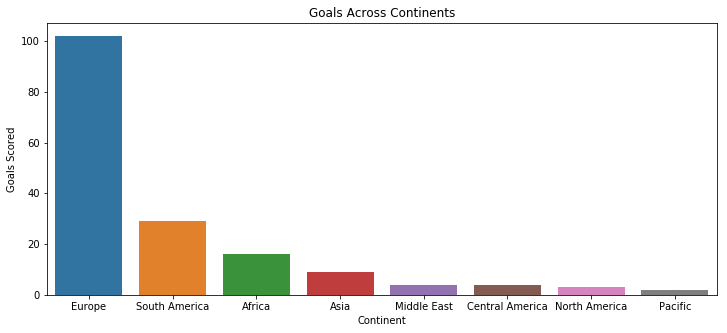

In [443]:
# goals by continent

%matplotlib inline
plt.figure(figsize = (12,5))
sb.countplot(goals_df['continent'], order = goals_df['continent'].value_counts().index)
plt.title('Goals Across Continents')
plt.xlabel('Continent')
plt.ylabel('Goals Scored')

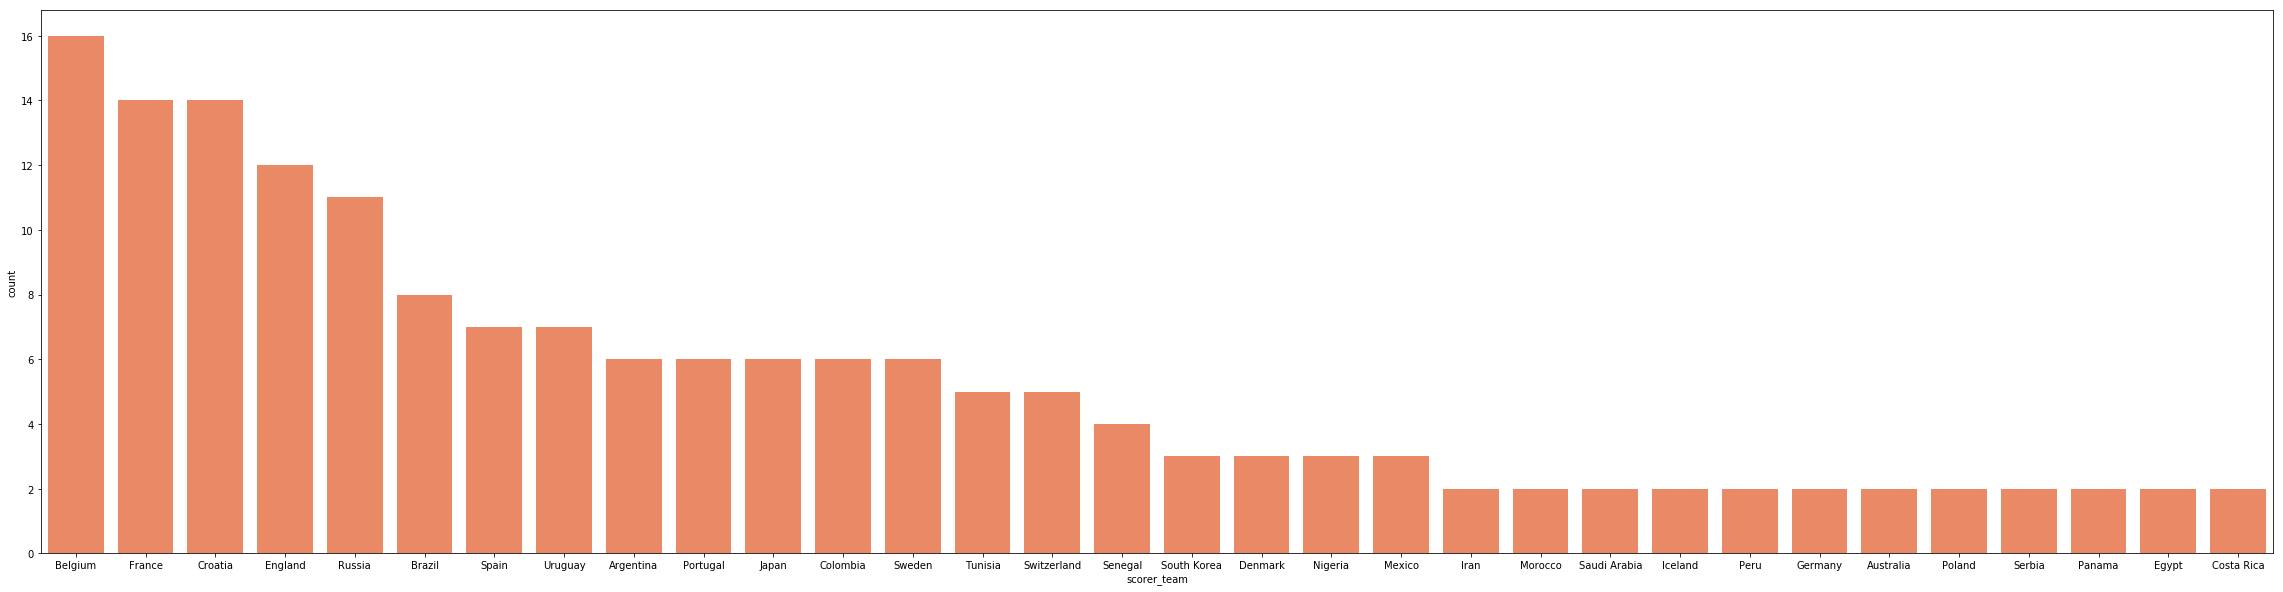

In [583]:
# goals by country
plt.figure(figsize=(40,10))
sb.countplot(goals_df['scorer_team'], order = goals_df['scorer_team'].value_counts().index, color = 'Coral')

('Belgium', 'Russia', 'France', 'Croatia', 'Spain', 'England', 'Tunisia', 'Brazil', 'Portugal', 'Argentina', 'Colombia', 'Japan', 'Uruguay', 'Senegal', 'Switzerland', 'Sweden', 'Nigeria', 'South Korea', 'Denmark', 'Mexico', 'Egypt', 'Morocco', 'Peru', 'Costa Rica', 'Germany', 'Poland', 'Iran', 'Serbia', 'Saudi Arabia', 'Australia', 'Iceland', 'Panama')
(2.2857142857142856, 2.2000000000000002, 2.0, 2.0, 1.75, 1.7142857142857142, 1.6666666666666667, 1.6000000000000001, 1.5, 1.5, 1.5, 1.5, 1.3999999999999999, 1.3333333333333333, 1.25, 1.2, 1.0, 1.0, 0.75, 0.75, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663)


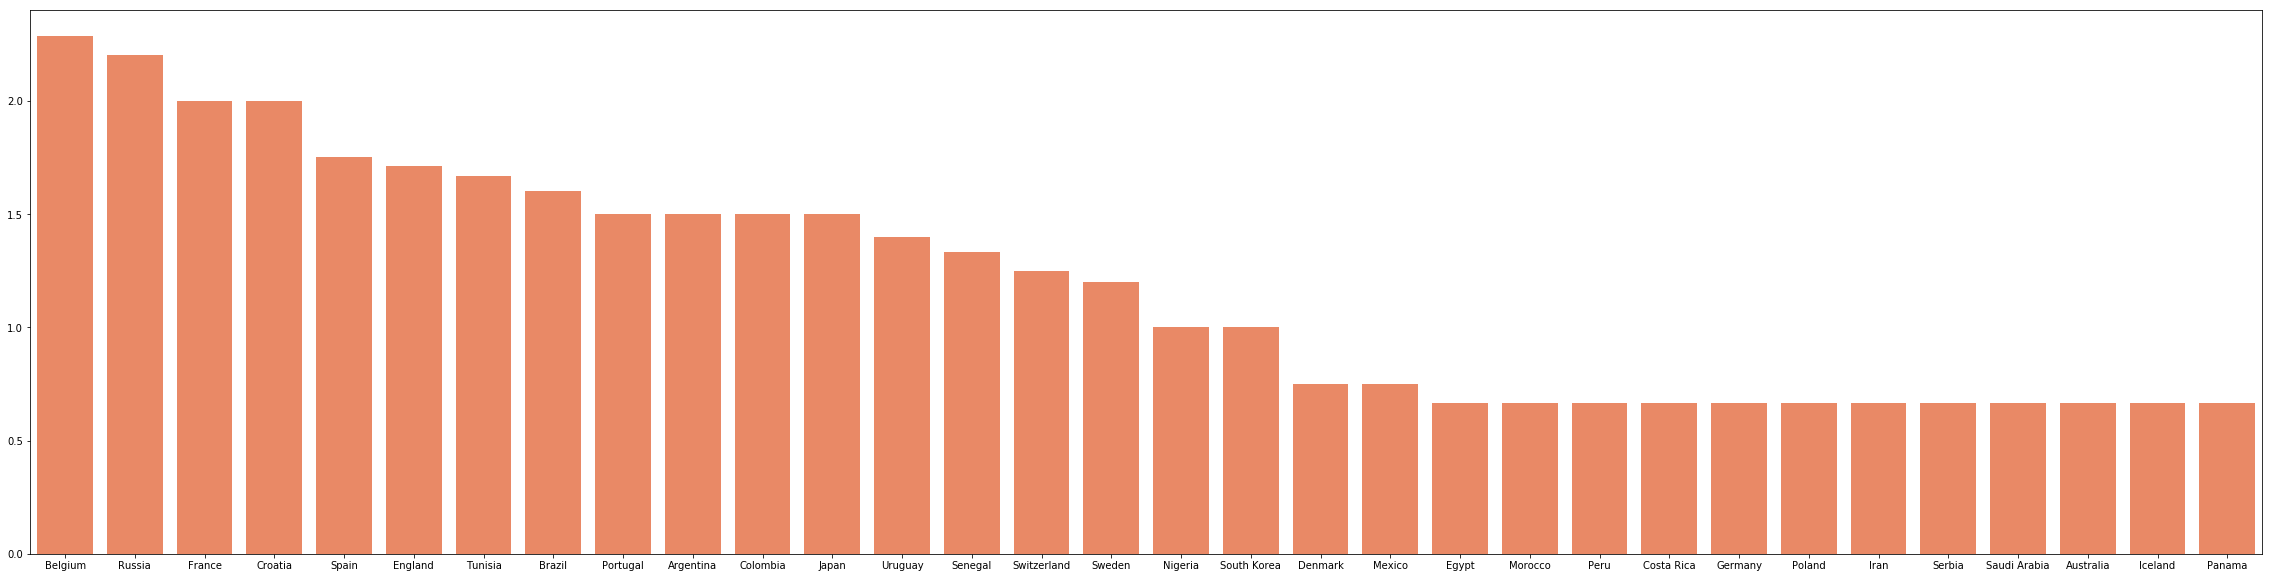

In [584]:
# average goals by country
games_df['country1'] = games_df['team1'].apply(lambda x : x['name'])
games_df['country2'] = games_df['team2'].apply(lambda x : x['name'])

x = games_df['country1'].value_counts()
y = games_df['country2'].value_counts()

appearances = dict.fromkeys(games_df['country1'].unique())
for country in x.keys():
    appearances[country] = x[country] + y[country]

z = goals_df['scorer_team'].value_counts()
average = dict.fromkeys(games_df['country1'].unique())
for country in x.keys():
    average[country] = z[country]/appearances[country]
    
sorted_average = sorted(average.items(), key=lambda kv: kv[1], reverse = True)

for x in zip(*sorted_average):
    print(x)

countries, avg = zip(*sorted_average)
plt.figure(figsize=(40,10))
sb.barplot(x=list(countries),y=list(avg), color = 'Coral')

[[]]

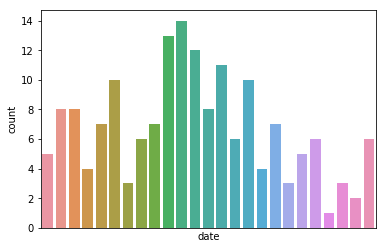

In [532]:
%matplotlib inline

ax = sb.countplot(data=goals_df, x='date')
ax.set(xticks=[])
# sb.distplot(goals_df['date'], hist_kws={'cumulative': True}, kde_kws={'cumulative': True})

[5, 8, 8, 4, 7, 10, 3, 6, 7, 13, 14, 12, 8, 11, 6, 10, 4, 7, 3, 5, 6, 1, 3, 2, 6]


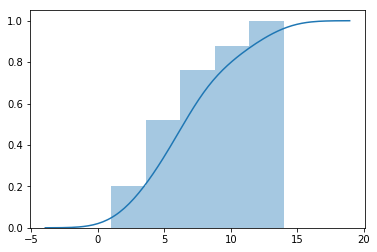

In [622]:
date_goals = goals_df['date'].value_counts()
# sb.distplot(goals_df['date'].value_counts(),
#              hist_kws=dict(cumulative=True),
#              kde_kws=dict(cumulative=True))

# print(sorted(date_goals.index))
# for x in zip(*sorted(date_goals.items())):
#     print (x)

date, goals = zip(*sorted(date_goals.items()))

sb.distplot(list(goals), hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

print(list(goals))

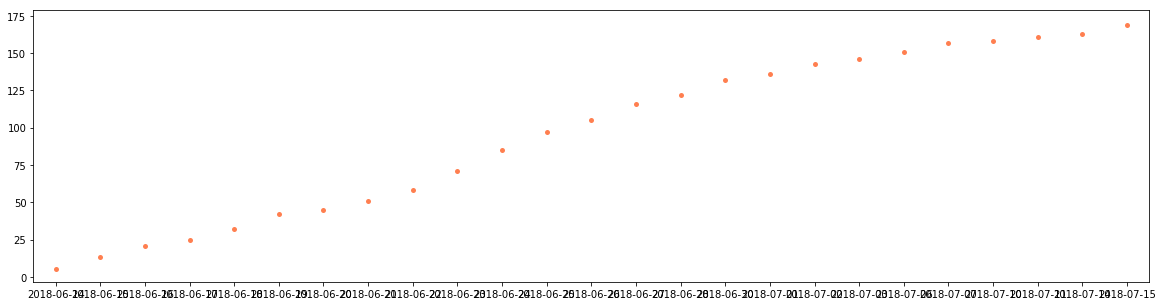

In [654]:
goals_by_date = dict(zip(date, goals))
goals_by_date_df = pd.Series(goals_by_date)
cumsum_date = goals_by_date_df.cumsum()
cumsum_date

ax = plt.figure(figsize=(20,5))
sb.swarmplot(x = cumsum_date.index, y = cumsum_date, color = 'Coral')

In [344]:
from tabula import read_pdf
players_df = read_pdf('2018_players.pdf', pages = 'all')

In [348]:
new_cols = ['position','shirtname', 'popname','club_country','birth_date','age','height','weight']
# new_cols_df = pd.DataFrame(columns = new_cols).fillna('')
# new_cols_df.head()

players_df = pd.concat([players_df,pd.DataFrame(columns = new_cols)])
players_df.fillna('', inplace = True)
players_df = players_df.drop(players_df[players_df['#'] == '#'].index)
players_df[players_df['Team'] == 'Belgium']

,#,Birth Date Shirt Name,Club,Height Weight,Pos. FIFA Popular Name,Team,Unnamed: 4,age,birth_date,club_country,height,popname,position,shirtname,weight
48,1,11.05.1992 COURTOIS,Chelsea FC (ENG),199 91,GK COURTOIS Thibaut,Belgium,,,,,,,,,
49,2,02.03.1989 ALDERWEIRELD,Tottenham Hotspur FC (ENG),186 81,DF ALDERWEIRELD Toby,Belgium,,,,,,,,,
50,3,14.11.1985 VERMAELEN,FC Barcelona (ESP),183 80,DF VERMAELEN Thomas,Belgium,,,,,,,,,
51,4,10.04.1986 KOMPANY,Manchester City FC (ENG),190 85,DF KOMPANY Vincent,Belgium,,,,,,,,,
52,5,24.04.1987 VERTONGHEN,Tottenham Hotspur FC (ENG),189 86,DF VERTONGHEN Jan,Belgium,,,,,,,,,
53,6,12.01.1989 WITSEL,Tianjin Quanjian FC (CHN),186 73,MF WITSEL Axel,Belgium,,,,,,,,,
54,7,28.06.1991 DE BRUYNE,Manchester City FC (ENG),181 70,MF DE BRUYNE Kevin,Belgium,,,,,,,,,
55,8,22.11.1987 FELLAINI,Manchester United FC (ENG),194 85,MF FELLAINI Marouane,Belgium,,,,,,,,,
56,9,13.05.1993 R. LUKAKU,Manchester United FC (ENG),190 94,FW LUKAKU Romelu,Belgium,,,,,,,,,
57,10,07.01.1991 E. HAZARD,Chelsea FC (ENG),173 74,FW HAZARD Eden,Belgium,,,,,,,,,


In [349]:
def return_rest(arr):
    arr.pop(0)
    return ' '.join(arr).lower()

In [350]:
return_rest(['dd','adD','da'])

'add da'

In [351]:
from datetime import datetime, date

players_df['position'] = players_df['Pos. FIFA Popular Name'].apply(lambda x: x.split(' ')[0])
players_df['height'] = players_df['Height Weight'].apply(lambda x: x.split(' ')[0])
players_df['weight'] = players_df['Height Weight'].apply(lambda x: x.split(' ')[1])
players_df['club_country'] = players_df['Club'].apply(lambda x: x.split(' ')[-1].strip('()'))
players_df['shirtname'] = players_df['Birth Date Shirt Name'].apply(lambda x: return_rest(x.split(' ')))
players_df['popname'] = players_df['Pos. FIFA Popular Name'].apply(lambda x: return_rest(x.split(' ')))
players_df['birth_date'] = players_df['Birth Date Shirt Name'].apply(lambda x: datetime.strptime(x.split(' ')[0],'%d.%m.%Y'))
players_df['age'] = players_df['birth_date'].apply(lambda x: int(((datetime.now() - x).days)/365))
players_df = players_df[['Club','Team','age','club_country','shirtname', 'popname','height','position','weight']]
players_df[players_df['Team'] == 'Belgium']

,Club,Team,age,club_country,shirtname,popname,height,position,weight
48,Chelsea FC (ENG),Belgium,26,ENG,courtois,courtois thibaut,199,GK,91
49,Tottenham Hotspur FC (ENG),Belgium,29,ENG,alderweireld,alderweireld toby,186,DF,81
50,FC Barcelona (ESP),Belgium,32,ESP,vermaelen,vermaelen thomas,183,DF,80
51,Manchester City FC (ENG),Belgium,32,ENG,kompany,kompany vincent,190,DF,85
52,Tottenham Hotspur FC (ENG),Belgium,31,ENG,vertonghen,vertonghen jan,189,DF,86
53,Tianjin Quanjian FC (CHN),Belgium,29,CHN,witsel,witsel axel,186,MF,73
54,Manchester City FC (ENG),Belgium,27,ENG,de bruyne,de bruyne kevin,181,MF,70
55,Manchester United FC (ENG),Belgium,30,ENG,fellaini,fellaini marouane,194,MF,85
56,Manchester United FC (ENG),Belgium,25,ENG,r. lukaku,lukaku romelu,190,FW,94
57,Chelsea FC (ENG),Belgium,27,ENG,e. hazard,hazard eden,173,FW,74


In [356]:
players_df[players_df['Team'] == 'France']

,Club,Team,age,club_country,shirtname,popname,height,position,weight
240,Tottenham Hotspur FC (ENG),France,31,ENG,lloris,lloris hugo,188,GK,82
241,VfB Stuttgart (GER),France,22,GER,pavard,pavard benjamin,186,DF,76
242,Paris Saint-Germain FC (FRA),France,22,FRA,kimpembe,kimpembe presnel,182,DF,78
243,Real Madrid CF (ESP),France,25,ESP,varane,varane raphael,191,DF,79
244,FC Barcelona (ESP),France,24,ESP,umtiti,umtiti samuel,183,DF,84
245,Manchester United FC (ENG),France,25,ENG,pogba,pogba paul,191,MF,86
246,Atletico Madrid (ESP),France,27,ESP,griezmann,griezmann antoine,174,FW,72
247,AS Monaco (FRA),France,22,FRA,lemar,lemar thomas,172,FW,65
248,Chelsea FC (ENG),France,31,ENG,giroud,giroud olivier,193,FW,91
249,Paris Saint-Germain FC (FRA),France,19,FRA,mbappe,mbappe kylian,178,FW,78


In [357]:
def strip_accents(s):
    """
    Sanitarize the given unicode string and remove all special/localized
    characters from it.
 
    Category "Mn" stands for Nonspacing_Mark
    """
    try:
        return ''.join(
            c for c in unicodedata.normalize('NFD', s)
            if unicodedata.category(c) != 'Mn'
        )
    except:
        return s

In [ ]:
# accents
# one or two phrases
# opposite order

In [360]:
count = 0
for index, goal in goals_df.iterrows():
    if strip_accents(goal['scorer']) not in strip_accents(players_df['shirtname'].unique()) and strip_accents(goal['scorer'] not in players_df['popname'].unique()):
        count += 1
        print(goal['scorer'])
print(count)

gazinsky
giménez
costa
costa
poulsen
coutinho
lozano
lukaku
lukaku
m. salah
l. suárez
mbappé
coutinho
son heung-min
carlos v.
mané
m. wagué
l. suárez
e. cavani
salman al-faraj
salem al-dawsari
m. salah
karim ansarifard
marcos rojo
g. sigurðsson
džemaili
drmić
waston
kim young-gwon
son heung-min
álvarez
adnan januzaj
yassine meriah
fakhereedine ben youssef
wahbi khazri
edinson cavani
edinson cavani
antoine griezmann
benjamin pavard
kylian mbappé
kylian mbappé
ángel di maría
gabriel mercado
sergio agüero
sergei ignashevich
artem dzyuba
mario mandžukić
mathias jørgensen
jan vertonghen
marouane fellaini
nacer chadli
genki haraguchi
takashi inui
emil forsberg
yerry mina
harry kane
raphaël varane
antoine griezmann
kevin de bruyne
denis cheryshev
mário figueira fernandes
andrej kramarić
domagoj vida
harry maguire
dele alli
samuel umtiti
ivan perišić
mario mandžukić
kieran trippier
thomas meunier
eden hazard
mario mandžukić
mbappé
mario mandžukić
74


In [402]:
players_df['shirtname'].unique()

array(['guzmán', 'mercado', 'tagliafico', 'ansaldi', 'biglia', 'fazio',
       'banega', 'acuña', 'higuaín', 'messi', 'di maría', 'armani', 'meza',
       'mascherano', 'lanzini', 'rojo', 'otamendi', 'salvio', 'agüero',
       'lo celso', 'dybala', 'pavón', 'caballero', 'ryan', 'degenek',
       'meredith', 'cahill', 'milligan', 'jurman', 'leckie', 'luongo',
       'juric', 'kruse', 'nabbout', 'jones', 'mooy', 'maclaren', 'jedinak',
       'behich', 'arzani', 'vukovic', 'risdon', 'sainsbury', 'petratos',
       'irvine', 'rogic', 'courtois', 'alderweireld', 'vermaelen',
       'kompany', 'vertonghen', 'witsel', 'de bruyne', 'fellaini',
       'r. lukaku', 'e. hazard', 'carrasco', 'mignolet', 'casteels',
       'mertens', 'meunier', 't. hazard', 'tielemans', 'januzaj',
       'dembele', 'boyata', 'batshuayi', 'chadli', 'dendoncker',
       'a. becker', 't. silva', 'miranda', 'geromel', 'casemiro',
       'filipe luis', 'd. costa', 'r. augusto', 'g. jesus', 'neymar jr',
       'p. coutin

In [403]:
goals_df['scorer'].unique()

array(['gazinsky', 'cheryshev', 'dzyuba', 'golovin', 'giménez', 'ronaldo',
       'costa', 'nacho', 'bouhaddouz', 'griezmann', 'behich', 'jedinak',
       'poulsen', 'agüero', 'finnbogason', 'etebo', 'modrić', 'coutinho',
       'zuber', 'kolarov', 'lozano', 'granqvist', 'mertens', 'lukaku',
       'sassi', 'kane', 'krychowiak', 'cionek', 'niang', 'j. quintero',
       'kagawa', 'osako', 'a. fathi', 'm. salah', 'l. suárez',
       'diego costa', 'mbappé', 'eriksen', 'rebić', 'rakitić', 'musa',
       'neymar', 'mitrović', 'xhaka', 'shaqiri', 'reus', 'kroos',
       'toivonen', 'son heung-min', 'carlos v.', 'j. hernández',
       'e. hazard', 'r. lukaku', 'batshuayi', 'bronn', 'khazri', 'stones',
       'lingard', 'baloy', 'y. mina', 'falcao', 'cuadrado', 'inui',
       'honda', 'mané', 'm. wagué', 'e. cavani', 'salman al-faraj',
       'salem al-dawsari', 'karim ansarifard', 'quaresma', 'isco',
       'iago aspas', 'boutaib', 'en-nesyri', 'carrillo', 'guerrero',
       'moses', 'messi'